# Zomato Project
### Problem Statement : Predict restaurant ratings based on location, service features, and cuisine information using Zomato restaurant dataset.
### By Mowleen Armstrong

In [2]:
import pandas as pd

# Load files
zomato = pd.read_csv("C:/Users/Mowleen/OneDrive/Desktop/EDA Practice/zomato.csv", encoding='ISO-8859-1')
countries = pd.read_excel("C:/Users/Mowleen/OneDrive/Desktop/EDA Practice/Country-Code.xlsx")
# or use read_csv()

# Merge
zomato = zomato.merge(countries, on='Country Code', how='left')

In [3]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [3]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [7]:
india = zomato[zomato['Country'] == 'India']
top_rated = india[india['Aggregate rating'] > 4.0]
top_rated = top_rated.sort_values(['City', 'Aggregate rating', 'Votes'], ascending=[True, False, False])

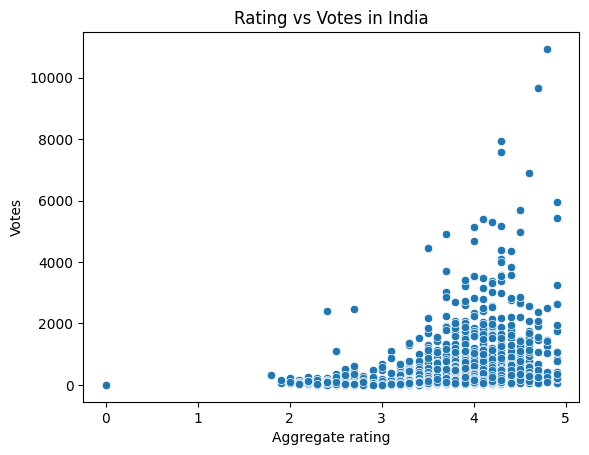

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=india, x='Aggregate rating', y='Votes')
plt.title("Rating vs Votes in India")
plt.show()


In [9]:
country_counts = zomato['Country'].value_counts()
print(country_counts)

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


In [10]:
online_delivery = zomato[zomato['Has Online delivery'] == 'Yes']
top_online = online_delivery.sort_values(['Aggregate rating', 'Votes'], ascending=False).head(5)

In [11]:
cheap_best = india[(india['Average Cost for two'] < 300) & (india['Aggregate rating'] > 4)]
cheap_best = cheap_best.sort_values(['City', 'Aggregate rating'], ascending=[True, False])

In [12]:
top_cuisines = india.groupby('City')['Cuisines'].apply(lambda x: x.value_counts().index[0])
print(top_cuisines)

City
Agra                                        North Indian, Mughlai
Ahmedabad       Chinese, Italian, North Indian, Mexican, Medit...
Allahabad                                   North Indian, Chinese
Amritsar                                             North Indian
Aurangabad                                           North Indian
Bangalore                                    Pizza, Cafe, Italian
Bhopal                                                  Fast Food
Bhubaneshwar                                              Chinese
Chandigarh              North Indian, Chinese, Continental, Pizza
Chennai              North Indian, Mughlai, Chinese, South Indian
Coimbatore                           Cafe, Continental, Fast Food
Dehradun                                    North Indian, Chinese
Faridabad                                            North Indian
Ghaziabad                                            North Indian
Goa                                                   Finger Food
Gurga

In [13]:
agg_rating = india.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print(agg_rating)

City
Secunderabad    4.500000
Bangalore       4.375000
Hyderabad       4.344444
Chennai         4.315000
Mohali          4.300000
Kolkata         4.255000
Goa             4.245000
Pune            4.220000
Panchkula       4.200000
Lucknow         4.195238
Guwahati        4.190476
Ahmedabad       4.161905
Coimbatore      4.135000
Jaipur          4.130000
Mumbai          4.085000
Kochi           4.080000
Chandigarh      4.050000
Dehradun        4.050000
Vadodara        4.025000
Vizag           4.005000
Bhubaneshwar    3.980952
Ludhiana        3.980000
Indore          3.970000
Agra            3.965000
Nagpur          3.965000
Bhopal          3.950000
Surat           3.935000
Kanpur          3.815000
Mangalore       3.745000
Puducherry      3.730000
Mysore          3.695000
Amritsar        3.685714
Nashik          3.520000
Varanasi        3.510000
Patna           3.455000
Ranchi          3.455000
Allahabad       3.395000
Aurangabad      3.375000
Ghaziabad       2.852000
Gurgaon         2.65

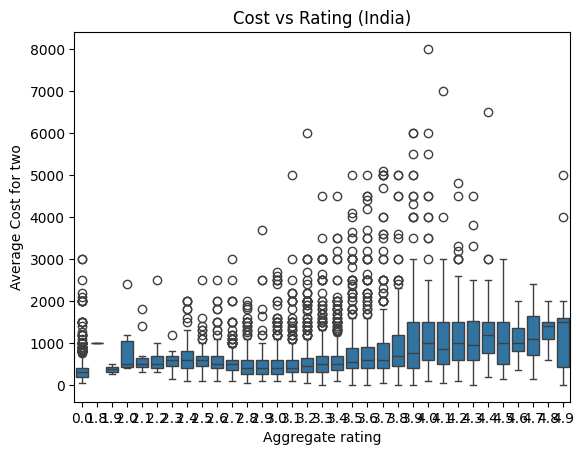

In [14]:
sns.boxplot(data=india, x='Aggregate rating', y='Average Cost for two')
plt.title("Cost vs Rating (India)")
plt.show()


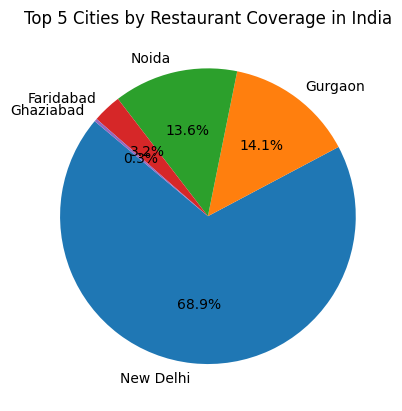

In [15]:
city_counts = india['City'].value_counts().head(5)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Cities by Restaurant Coverage in India")
plt.show()

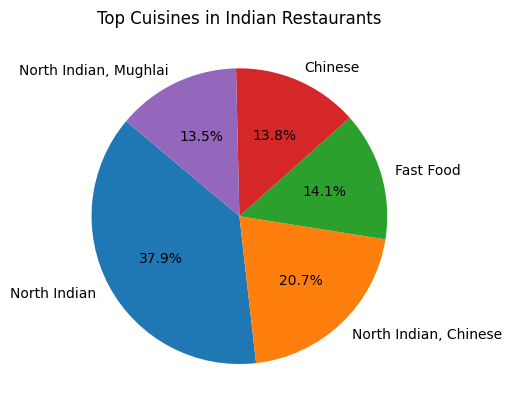

In [16]:
cuisine_counts = india['Cuisines'].value_counts().head(5)
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top Cuisines in Indian Restaurants")
plt.show()

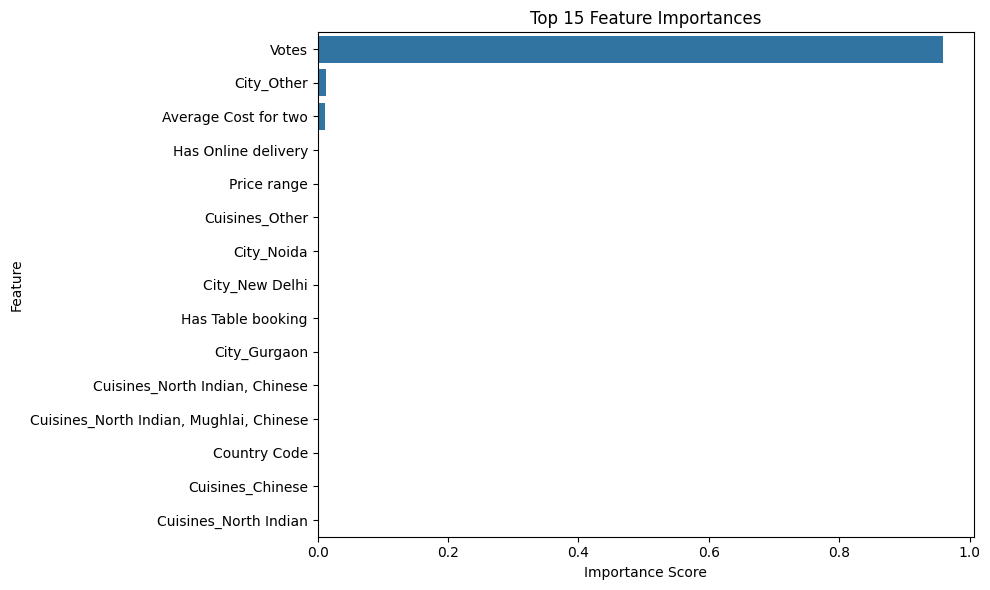

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [5]:
# Make a copy to preserve original data
df = zomato.copy()

# Drop unnecessary columns
cols_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
    'Longitude', 'Latitude', 'Switch to order menu', 'Currency', 'Rating color', 'Rating text'
]
df.drop(columns=cols_to_drop, inplace=True)

# Drop rows with missing target or features (like 'Cuisines')
df.dropna(subset=['Cuisines', 'Aggregate rating'], inplace=True)

# Convert categorical binary features: 'Yes' → 1, 'No' → 0
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert categorical variables: 'City', 'Country', 'Cuisines'
# For simplicity, we'll encode only top N frequent items and mark others as "Other"
def simplify_column(col, top_n=10):
    top_items = df[col].value_counts().nlargest(top_n).index
    return df[col].apply(lambda x: x if x in top_items else 'Other')

df['City'] = simplify_column('City')
df['Country'] = simplify_column('Country')
df['Cuisines'] = simplify_column('Cuisines')

# One-hot encode the categorical features
df = pd.get_dummies(df, columns=['City', 'Country', 'Cuisines'], drop_first=True)

# Show cleaned dataframe shape and preview
df.shape, df.head()

((9542, 38),
    Country Code  Average Cost for two  Has Table booking  Has Online delivery  \
 0           162                  1100                  1                    0   
 1           162                  1200                  1                    0   
 2           162                  4000                  1                    0   
 3           162                  1500                  0                    0   
 4           162                  1500                  1                    0   
 
    Is delivering now  Price range  Aggregate rating  Votes  City_Amritsar  \
 0                  0            3               4.8    314          False   
 1                  0            3               4.5    591          False   
 2                  0            4               4.4    270          False   
 3                  0            4               4.9    365          False   
 4                  0            4               4.8    229          False   
 
    City_Bhubaneshwar  

## Linear Regression Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Split features and target
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

# Step 2: Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = lr_model.predict(X_test)

# Step 5: Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.9690
Root Mean Squared Error (RMSE): 1.1910
R-squared Score (R2): 0.3806


## Random Forest Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared Score (R2): {r2_rf:.4f}")

Mean Absolute Error (MAE): 0.2237
Root Mean Squared Error (RMSE): 0.3385
R-squared Score (R2): 0.9500
